# Entregável 3 de Visão Computacional e Robótica


Entrega até 12/03 ao fim do atendimento (a revisar)

Pode ser feito **em trios**

Nesta semana vamos trabalhar com um assunto extremamente atual: reconhecimento de objetos e rastreamento


Referências:

[https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/](https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/)

[https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/](https://github.com/iArunava/YOLOv3-Object-Detection-with-OpenCV/)

[https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/](https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/)

Ouça a explicacão do professor sobre rastreamento e deteção

In [23]:
import cv2
import matplotlib.pyplot as plt
import biblioteca

if (sys.version_info > (3, 0)): 
    # Modo Python 3
    import importlib
    importlib.reload(biblioteca) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    # Modo Python 2
    reload(biblioteca)

### Carregar as imagens

A seguir, vocês podem alterar qual imagem de teste esta sendo utilizada no notebook, o codigo deve funcionar em todas as 3.


In [24]:
img1 = cv2.imread("frame01.jpg")
img2 = cv2.imread("frame02.jpg")
img3 = cv2.imread("frame03.jpg") # Mais dificil

img = img1.copy()

## Parte 1
### Segmentar Linhas Amarelas
Modifique a função `segmenta_linha_amarela` do arquivo [fotogrametria.py](fotogrametria.py) para segmentar as linhas amarelas no centro da pista.

Utiliza a função cv2.morphologyEx() para limpar ruidos na imagem

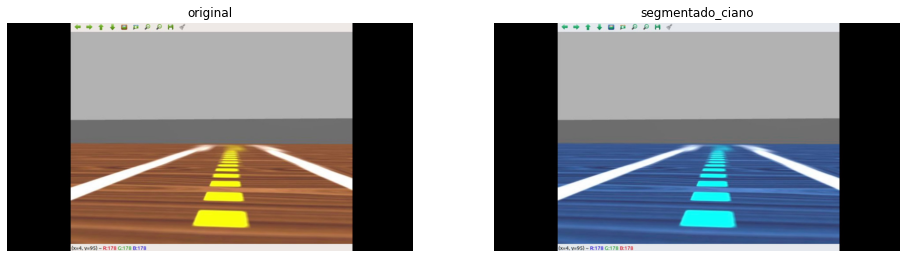

In [25]:
mask = biblioteca.segmenta_linha_amarela(img)

f, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(mask, cmap="Greys_r")
ax[0].set_title('original')
ax[1].set_title('segmentado_ciano')

ax[0].axis('off')
ax[1].axis('off')

plt.show()

# Saida Esperada:
# Uma imagem com o as linhas amarelas da pista em branco

## Parte 2
### Segmentar Segmentos da Linha Amarela
Modifique a função `encontrar_contornos` e `encontrar_centro_dos_contornos` do arquivo [fotogrametria.py](fotogrametria.py) calcular os contornos e calcular o centro. Na função `encontrar_centro_dos_contornos` desenhe também o centro com uma cruz.

Dica: Utilize `crosshair(img, point, size, color)` para desenhar uma cruz no ponto.

In [26]:
# Contornos
contornos = biblioteca.encontrar_contornos(mask)
cv2.drawContours(img, contornos, -1, [0, 0, 255], 2)

# # Centro de Massa
img, X, Y = biblioteca.encontrar_centro_dos_contornos(img, contornos)

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Saida Esperada:
# Imagem original com os contornos de cada segmento denhados e uma cruz no centro de cada um.

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


## Parte 3
### Segmentar Segmentos da Linha Amarela

Primeiro modifique a função `desenhar_linha_entre_pontos` do arquivo [fotogrametria.py](fotogrametria.py) para desenhar uma linha entre cada um dos centros dos segmentos.



Em seguida modifique a função `regressao_por_centro` do arquivo [fotogrametria.py](fotogrametria.py) para ajustar uma linha entre os centros dos segmentos. Desenhe a linha na imagem.



Dica: `cv2.line(img,ponto1,ponto2,color,2)` desenha uma linha que passe entre os pontos, mesmo que ponto1 e ponto2 `não pertençam` a imagem.

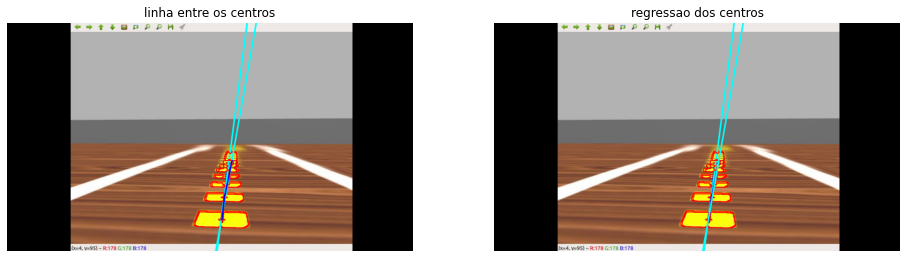

In [18]:
f, ax = plt.subplots(1, 2, figsize=(16,6))

# Desenhar Linha entre pontos
img = biblioteca.desenhar_linha_entre_pontos(img, X,Y, (255,0,0))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Regressão Linear
if X:
## Regressão pelo centro
    img_por_centro = biblioteca.regressao_por_centro(img, X,Y)

ax[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('linha entre os centros')
ax[1].set_title('regressao dos centros')

ax[0].axis('off')
ax[1].axis('off')

plt.show()
# Saida Esperada:
# Uma imagem com uma linha entreo os centros e outra com a regrassão dos pontos

## Parte 4
### Repetir em um stream de video

Agora, modifique o arquivo [run_on_video.py](run_on_video.py) com todos os recursos mostrados anteriormente, para que a linha acompanhe o movimento do robo.

### Baixe o arquivo a seguir para funcionar:
### https://github.com/Insper/robot202/raw/master/projeto/centro_massa/video.mp4